In [1]:
from darts.models.forecasting.lgbm import LightGBMModel
from darts import TimeSeries

Support for Torch based models not available. To enable them, install "darts", "u8darts[torch]" or "u8darts[all]" (with pip); or "u8darts-torch" or "u8darts-all" (with conda).
/home/mahdi/anaconda3/envs/darts/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
df = pd.read_csv('datasets/climate/temp_anom_w_forcing.csv')

<Axes: xlabel='Year'>

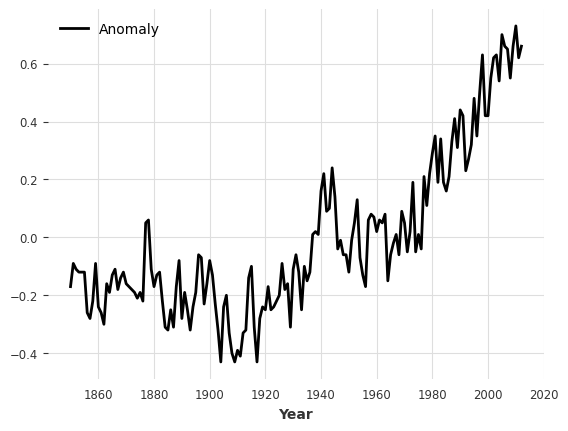

In [3]:
list_of_covariates = ['WMGHG', 'Ozone', 'Solar', 'Land_Use', 'SnowAlb_BC', \
                      'Orbital', 'TropAerDir', 'TropAerInd', 'StratAer']


target_series = TimeSeries.from_dataframe(df, 'Year', 'Anomaly')
past_covariates = TimeSeries.from_dataframe(df, 'Year', list_of_covariates)

target_series.plot()

<Axes: xlabel='Year'>

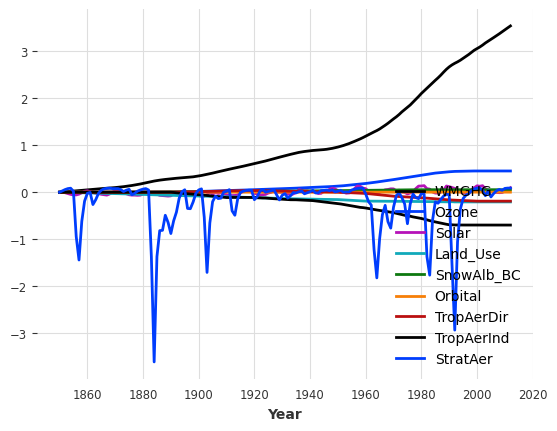

In [4]:
past_covariates.plot()

In [5]:
num_test = 5
target_series_train, target_series_test = target_series[:-num_test], target_series[-num_test:]

In [6]:
n_lags = 100
model = LightGBMModel(lags=n_lags, output_chunk_length=num_test, \
                      lags_past_covariates=[-n_lags]*past_covariates.n_components)

In [7]:
model.fit(target_series_train, past_covariates=past_covariates)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2804
[LightGBM] [Info] Number of data points in the train set: 54, number of used features: 163
[LightGBM] [Info] Start training from score 0.178519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LightGBMModel(lags=100, lags_past_covariates=[-100, -100, -100, -100, -100, -100, -100, -100, -100], lags_future_covariates=None, output_chunk_length=5, add_encoders=None, likelihood=None, quantiles=None, random_state=None, multi_models=True, use_static_covariates=True, categorical_past_covariates=None, categorical_future_covariates=None, categorical_static_covariates=None)

In [8]:
target_series_test_pred = model.predict(num_test, past_covariates=past_covariates)

<Axes: xlabel='Year'>

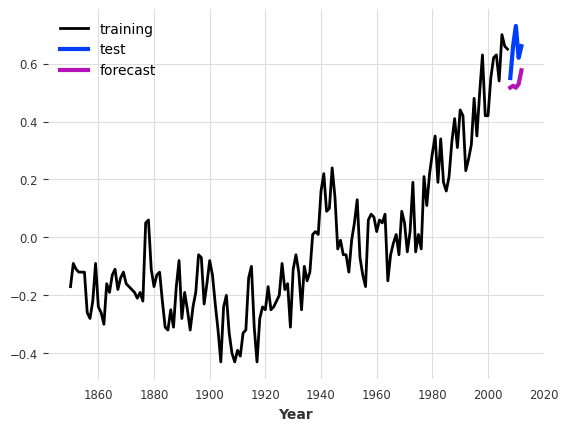

In [9]:
target_series_train.plot(label='training')
target_series_test.plot(label='test', lw=3)
target_series_test_pred.plot(label='forecast', lw=3)

<Axes: xlabel='Year'>

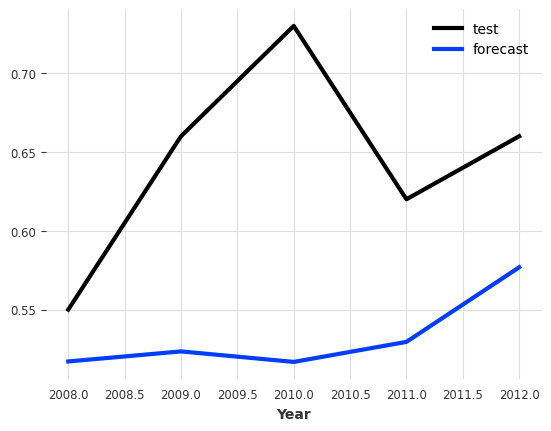

In [10]:
target_series_test.plot(label='test', lw=3)
target_series_test_pred.plot(label='forecast', lw=3)